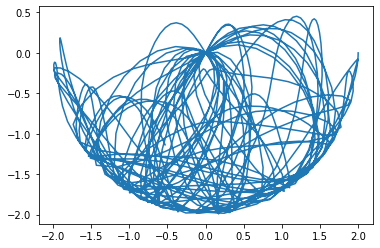

In [3]:
# This is from my own manual derivations + sympy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def double_pendulum(t, y, l, m1, m2, g, k, b):
    theta1, theta_dot1, theta2, theta_dot2 = y

    # Equations of motion
    
    # sin_12 = np.sin(theta1 - theta2)
    # cos_12 = np.cos(theta1 - theta2)
    # sin_1 = np.sin(theta1)
    # sin_2 = np.sin(theta2)

    # broken up in terms to make it easier to check 
    # term_1 = -m2 * l**2 * theta_dot1**2 * cos_12 * sin_12
    # term_2 = m2 * l * g * cos_12 * sin_2
    # term_3 = k * (theta2 - theta1) * cos_12
    # term_4 = b * theta_dot2 * cos_12
    # term_5 = -m2 * l**2 * theta_dot2**2 * sin_12
    # term_6 = -g * l * (m1 + m2) * sin_1 
    # term_7 = k * (theta2 - theta1)

    cos = np.cos
    sin = np.sin
    
    theta_double_dot1 = (b*cos(theta1 - theta2)*theta_dot2 - g*l*m1*sin(theta1) - g*l*m2*sin(theta1 - 2*theta2)/2 - g*l*m2*sin(theta1)/2 - k*theta1*cos(theta1 - theta2) - k*theta1 + k*theta2*cos(theta1 - theta2) + k*theta2 - l**2*m2*sin(theta1 - theta2)*theta_dot2**2 - l**2*m2*sin(2*theta1 - 2*theta2)*theta_dot1**2/2)/(l**2*(m1 - m2*cos(theta1 - theta2)**2 + m2))

    theta_double_dot2 = (-b*theta_dot2 - g*l*m2*sin(theta2) + k*theta1 - k*theta2 + l**2*m2*(sin(theta1 - theta2)*theta_dot1**2 - cos(theta1 - theta2)*theta_double_dot1))/(l**2*m2)



    return [theta_dot1, theta_double_dot1, theta_dot2, theta_double_dot2]

# Parameters
l = 1.
m1 = 1.0  # Mass of the first pendulum
m2 = 1.0  # Mass of the second pendulum
g = 9.8   # Acceleration due to gravity
k = 0
b = 0
# Initial conditions
theta1_0 = np.pi/2  # Initial angle of the first pendulum (in radians)
theta1_dot_0 = 0.0      # Initial angular velocity of the first pendulum
theta2_0 = np.pi/2  # Initial angle of the second pendulum (in radians)
theta2_dot_0 = 0    # Initial angular velocity of the second pendulum

# Time span
t_span = (0.0, 60.0)  # Simulation time span

# Solve the system of differential equations
sol = solve_ivp(lambda t, y: double_pendulum(t, y, l, m1, m2, g, k, b), t_span, [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0], method='DOP853', dense_output=True, rtol=1e-6, atol=1e-6)

# Evaluate the solution to get theta1, theta2 as functions of time
t_eval, dt = np.linspace(t_span[0], t_span[1], 1001, retstep=True)
theta1, theta_dot1, theta2, theta_dot2 = sol.sol(t_eval)

# Plot the motion of the double pendulum
x1_sym_2 = l * np.sin(theta1)
y1_sym_2 = -l * np.cos(theta1)
x2_sym_2 = x1_sym_2 + l * np.sin(theta2)
y2_sym_2 = y1_sym_2 - l * np.cos(theta2)

fig, ax = plt.subplots()
# plt.plot(x1, y1, label='Pendulum 1')
ax.plot(x2_sym_2, y2_sym_2, label='Pendulum 2')
plt.show()



In [4]:
def set_dataset_conditions(dataset_number):
    if dataset_number == 1 or dataset_number == 2 or dataset_number == 3:
        theta1_0 = np.pi/2 
        theta1_dot_0 = 0.0      
        theta2_0 = np.pi/2  
        theta2_dot_0 = 0.0
    else:
        theta1_0 = np.pi/2 
        theta1_dot_0 = 0.0      
        theta2_0 = np.pi/2  
        theta2_dot_0 = 10 * np.pi
    if dataset_number == 1 or dataset_number == 4:
        k = 0.
        b = 0.
    elif dataset_number == 2 or dataset_number == 5:
        k = 1
        b = 2
    else:
        k = 10
        b = 20
    return [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0], k, b

In [5]:
datasets_dict = {}
n_datasets = 6
for i in range(1, n_datasets+1):
    datasets_dict[i] = {}

In [74]:
dataset_n = 6
init_conditions, k, b = set_dataset_conditions(dataset_n)
t_span = (0.0, 60.0)  # Simulation time span

# Solve the system of differential equations
sol = solve_ivp(lambda t, y: double_pendulum(t, y, l, m1, m2, g, k, b), t_span, init_conditions, method='DOP853', dense_output=True, rtol=1e-6, atol=1e-6)

# Evaluate the solution to get theta1, theta2 as functions of time
t_eval, dt = np.linspace(t_span[0], t_span[1], 10001, retstep=True)
theta1, theta_dot1, theta2, theta_dot2 = sol.sol(t_eval)

# Plot the motion of the double pendulum
x1_sym_2 = l * np.sin(theta1)
y1_sym_2 = -l * np.cos(theta1)
x2_sym_2 = x1_sym_2 + l * np.sin(theta2)
y2_sym_2 = y1_sym_2 - l * np.cos(theta2)

datasets_dict[dataset_n]['theta1'] = theta1
datasets_dict[dataset_n]['theta_dot1'] = theta_dot1
datasets_dict[dataset_n]['theta2'] = theta2
datasets_dict[dataset_n]['theta_dot2'] = theta_dot2
datasets_dict[dataset_n]['dt'] = dt

In [13]:
save = False

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


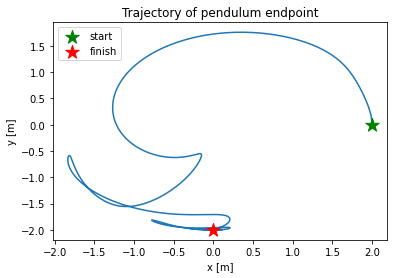

In [399]:
plt.plot(x2_sym_2[:], y2_sym_2[:])
plt.scatter(x2_sym_2[0], y2_sym_2[0], marker='*', c='green', s=200, label='start', zorder=10)
plt.scatter(x2_sym_2[-1], y2_sym_2[-1], marker='*', c='red', s=200, label='finish', zorder=10)
plt.xlabel('x [m]' )
plt.ylabel('y [m]')
plt.title('Trajectory of pendulum endpoint')
plt.legend()
if save:
    plt.savefig(f'plots/trajectory_{dataset_n}.eps', bbox_inches='tight', dpi=600)

In [300]:
x2_sym_2[-1]

-1.2796775387177761e-07

In [301]:
theta1.size

10001

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


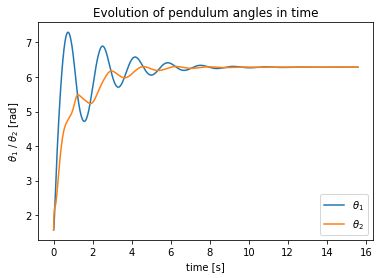

In [402]:
stop_idx = 2600
time = np.linspace(0, stop_idx * dt, stop_idx)
plt.plot(time, theta1[:stop_idx], label=r'$\theta_1$')
plt.plot(time, theta2[:stop_idx], label=r'$\theta_2$')
plt.xlabel('time [s]')
plt.ylabel(r'$\theta_1$' + ' / ' + r'$\theta_2$ ' + '[rad]')
plt.title('Evolution of pendulum angles in time')
plt.legend()
if save:
    plt.savefig(f'plots/angles_time_{dataset_n}.eps', bbox_inches='tight', dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


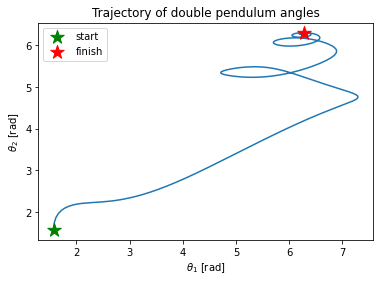

In [403]:
plt.plot(theta1[:], theta2[:])
plt.title('Trajectory of double pendulum angles')
plt.xlabel(r'$\theta_1$ [rad]')
plt.ylabel(r'$\theta_2$ [rad]')
plt.scatter(theta1[0], theta2[0], marker='*', c='green', s=200, label='start', zorder=10)
plt.scatter(theta1[-1], theta2[-1], marker='*', c='red', s=200, label='finish', zorder=10)
plt.legend()
if save:
    plt.savefig(f'plots/trajectory_angles_{dataset_n}.eps', bbox_inches='tight', dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


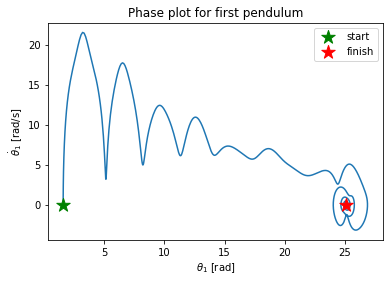

In [390]:
plt.plot(theta1[:], theta_dot1[:])
plt.title('Phase plot for first pendulum')
plt.xlabel(r'$\theta_1$ [rad]')
plt.ylabel(r'$\dot{\theta}_1$ [rad/s]')
plt.scatter(theta1[0], theta_dot1[0], marker='*', c='green', s=200, label='start', zorder=10)
plt.scatter(theta1[-1], theta_dot1[-1], marker='*', c='red', s=200, label='finish', zorder=10)
plt.legend()
if save:
    plt.savefig(f'plots/phase1_{dataset_n}.eps', bbox_inches='tight', dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


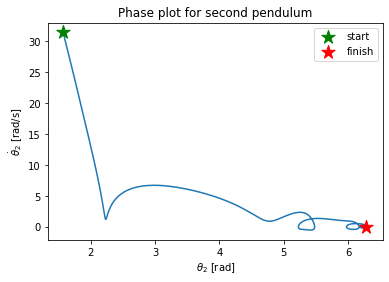

In [405]:
plt.plot(theta2[:], theta_dot2[:])
plt.title('Phase plot for second pendulum')
plt.xlabel(r'$\theta_2$ [rad]')
plt.ylabel(r'$\dot{\theta}_2$ [rad/s]')
plt.scatter(theta2[0], theta_dot2[0], marker='*', c='green', s=200, label='start', zorder=10)
plt.scatter(theta2[-1], theta_dot2[-1], marker='*', c='red', s=200, label='finish', zorder=10)
plt.legend()
if save:
    plt.savefig(f'plots/phase2_{dataset_n}.eps', bbox_inches='tight', dpi=600)

In [77]:
theta_rel = theta2 - theta1

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x1_array = np.array(theta1).reshape((-1,1))
x2_array = np.array(theta_rel).reshape((-1,1))

X = np.hstack((x1_array, x2_array))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

n_components = 2  
pca = PCA(n_components=n_components)

pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_

principal_components = pca.components_

# Print the results
print("Explained variance ratio:", explained_variance)
print("Principal components:", principal_components)

Explained variance ratio: [0.61927633 0.38072367]
Principal components: [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [308]:
# plt.plot(theta2 - theta1)

In [79]:
output = ''
for element in explained_variance:
    output += '\t' + "{:.4f}".format((element))
for element in principal_components.flatten():
    output += '\t' + "{:.4f}".format((element))
print(output)
# print(f'\t{explained_variance[0]}\t{explained_variance[1]}\n')


	0.6193	0.3807	-0.7071	0.7071	-0.7071	-0.7071


SyntaxError: unexpected EOF while parsing (<ipython-input-250-abce03257246>, line 2)

In [14]:
import math
import torch
import gpytorch
import tqdm
from matplotlib import pyplot as plt
import random
import copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
class MultitaskGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points, num_tasks, num_latents):
        # Let's use a different set of inducing points for each latent function
        inducing_points = inducing_points

        # We have to mark the CholeskyVariationalDistribution as batch
        # so that we learn a variational distribution for each task
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(
            inducing_points.size(-2), batch_shape=torch.Size([num_tasks])
        )

        # We have to wrap the VariationalStrategy in a LMCVariationalStrategy
        # so that the output will be a MultitaskMultivariateNormal rather than a batch output
        variational_strategy = gpytorch.variational.IndependentMultitaskVariationalStrategy(
            gpytorch.variational.VariationalStrategy(
                self, inducing_points, variational_distribution, learn_inducing_locations=True
            ),
            num_tasks=num_tasks,
        )

        super().__init__(variational_strategy)

        # The mean and covariance modules should be marked as batch
        # so we learn a different set of hyperparameters
        self.mean_module = gpytorch.means.ConstantMean(batch_shape=torch.Size([num_tasks]))
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(batch_shape=torch.Size([num_tasks])),
            batch_shape=torch.Size([num_tasks])
        )

    def forward(self, x):
        # The forward function should be written as if we were dealing with each output
        # dimension in batch
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


In [59]:
datasets_to_include = [1,2,3,5,6]
theta1_total = np.empty((0,1))
theta2_total = np.empty((0,1))

for i in datasets_to_include:
    if i == 4 or i == 5 or i == 6:
        ds_factor = 20
    else:
        ds_factor = 2
    theta1_total = np.vstack((theta1_total, datasets_dict[i]['theta1'].reshape(-1,1)[::ds_factor]))
    theta2_total = np.vstack((theta2_total, datasets_dict[i]['theta2'].reshape(-1,1)[::ds_factor]))
theta_rel_total = theta2_total - theta1_total


In [60]:
x1_tot = l * np.sin(theta1_total)
y1_tot = -l * np.cos(theta1_total)
x2_tot = x1_tot + l * np.sin(theta2_total)
y2_tot = y1_tot - l * np.cos(theta2_total)

In [61]:
theta1_total.shape

(2505, 1)

In [62]:
theta1_t = torch.from_numpy(theta1_total).reshape((-1,1))
theta2_t = torch.from_numpy(theta_rel_total).reshape((-1,1))

train_x = torch.hstack((theta1_t, theta2_t)).double()

x_t = torch.from_numpy(x2_tot).reshape((-1,1))
y_t = torch.from_numpy(y2_tot).reshape((-1,1))

train_y = torch.hstack((x_t, y_t)).double()

random.seed(42)
# generate 200 random numbers between 0 and 999
inducing_points_idxs = random.sample(range(train_x.shape[0]), int(train_x.shape[0] * 0.1))
inducing_points = copy.copy(train_x[inducing_points_idxs])

In [63]:
model = MultitaskGPModel(inducing_points=inducing_points, num_tasks=2, num_latents=4)
likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=2)
model.double()
likelihood.double()

MultitaskGaussianLikelihood(
  (raw_task_noises_constraint): GreaterThan(1.000E-04)
  (raw_noise_constraint): GreaterThan(1.000E-04)
)

In [64]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
num_epochs = 1 if smoke_test else 500


model.train()
likelihood.train()

optimizer = torch.optim.Adam([
    {'params': model.parameters()},
    {'params': likelihood.parameters()},
], lr=0.1)

# Our loss object. We're using the VariationalELBO, which essentially just computes the ELBO
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))

# We use more CG iterations here because the preconditioner introduced in the NeurIPS paper seems to be less
# effective for VI.
epochs_iter = tqdm.tqdm_notebook(range(num_epochs), desc="Epoch")
for i in epochs_iter:
    # Within each iteration, we will go over each minibatch of data
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    epochs_iter.set_postfix(loss=loss.item())
    loss.backward()
    optimizer.step()

/home/mariano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Epoch:   0%|          | 0/500 [00:00<?, ?it/s]

In [105]:
angle1 = np.random.uniform(low=-np.pi/2, high=np.pi/2, size=(100, 1))
angle2 = np.random.uniform(low=-np.pi/2, high=np.pi/2, size=(100, 1))
angles = np.hstack((angle1, angle2))
test_x = torch.from_numpy(angles)
test_y = np.empty_like(test_x)
test_y[:, 0] = np.sin(test_x[:,0]) + np.sin(test_x[:,1] + test_x[:,0])
test_y[:, 1] = -np.cos(test_x[:,0]) - np.cos(test_x[:,1] + test_x[:,0])
test_y = torch.from_numpy(test_y)

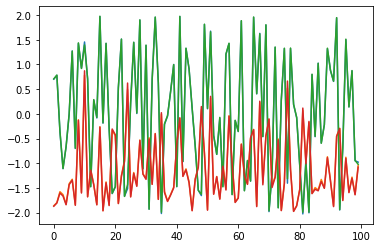

In [106]:
# Set into eval mode
model.eval()
likelihood.eval()

# Initialize plots
# fig, axs = plt.subplots(1, num_tasks, figsize=(4 * num_tasks, 3))

# Make predictions
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions = likelihood(model(test_x))
    mean = predictions.mean
    lower, upper = predictions.confidence_region()
# plt.plot(mean[:,0])
plt.plot(mean.detach()[:])
plt.plot(test_y[:])
# plt.plot(train_y)

In [107]:
errors = mean - test_y

tensor(2.2534, dtype=torch.float64)
tensor(0.0225, dtype=torch.float64)
tensor(0.1705, dtype=torch.float64)


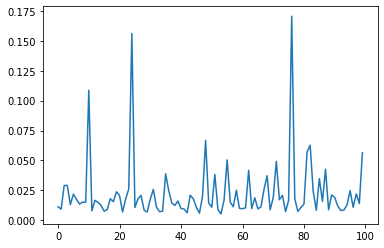

In [108]:
norm_errors = torch.linalg.norm(errors, axis=1)
sum_norm_error = norm_errors.sum()
plt.plot(norm_errors)
print(sum_norm_error)
print(norm_errors.mean())
print(norm_errors.max())

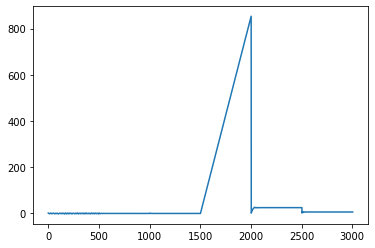

In [58]:
plt.plot(theta1_total)